# Depth Anything 3 (DA3) Usage Example

This notebook demonstrates how to use Depth Anything 3 for camera poses and depth estimation.


In [7]:
# Install required packages
# !pip install depth-anything-3

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
from depth_anything_3.api import DepthAnything3
from depth_anything_3.utils.visualize import visualize_depth
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = DepthAnything3.from_pretrained("/home/zhouyi/repo/Depth-Anything-3/checkpoints/DA3NESTED-GIANT-LARGE-1.1")
model = DepthAnything3.from_pretrained("/home/zhouyi/repo/Depth-Anything-3/checkpoints/DA3-BASE")
model = model.to(device)
model.eval()
print(f"Model loaded on {device}")


ModuleNotFoundError: No module named 'depth_anything_3'

In [9]:
# Load sample images and run inference
image_paths = [
    "/home/zhouyi/repo/Depth-Anything-3/assets/examples/SOH/000.png",
    "/home/zhouyi/repo/Depth-Anything-3/assets/examples/SOH/010.png"
]

# Run inference
prediction = model.inference(
    image=image_paths,
    process_res=504,
    process_res_method="upper_bound_resize",
    export_dir=None,
    export_format="glb"
)
print(f"Depth shape: {prediction.depth.shape}")
print(f"Extrinsics: {prediction.extrinsics.shape if prediction.extrinsics is not None else 'None'}")
print(f"Intrinsics: {prediction.intrinsics.shape if prediction.intrinsics is not None else 'None'}")


[INFO ] Processed Images Done taking 0.03732919692993164 seconds. Shape:  torch.Size([2, 3, 280, 504])
[INFO ] Model Forward Pass Done. Time: 2.063654661178589 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009872913360595703 seconds
Depth shape: (2, 280, 504)
Extrinsics: (2, 3, 4)
Intrinsics: (2, 3, 3)


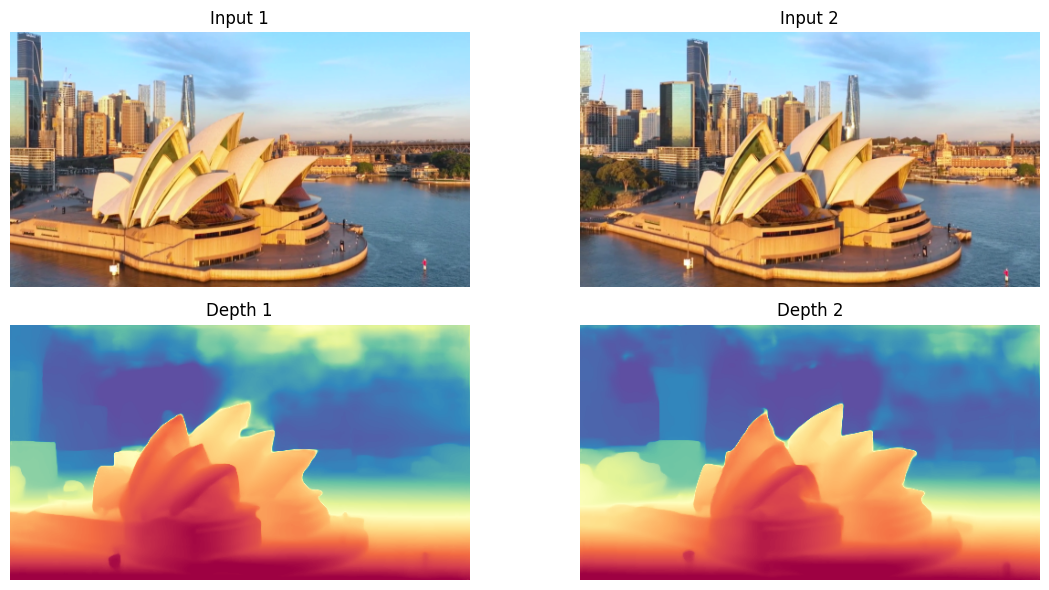

In [10]:
# Visualize input images and depth maps
n_images = prediction.depth.shape[0]

fig, axes = plt.subplots(2, n_images, figsize=(12, 6))

if n_images == 1:
    axes = axes.reshape(2, 1)

for i in range(n_images):
    # Show original image
    if prediction.processed_images is not None:
        axes[0, i].imshow(prediction.processed_images[i])
    axes[0, i].set_title(f"Input {i+1}")
    axes[0, i].axis('off')
    
    # Show depth map
    depth_vis = visualize_depth(prediction.depth[i], cmap="Spectral")
    axes[1, i].imshow(depth_vis)
    axes[1, i].set_title(f"Depth {i+1}")
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()